In [ ]:
#Note :
'''
This implementation does not generalizes for other dataset like circle.
after going through the article https://datascience-enthusiast.com/DL/Improving-DeepNeural-Networks-Initialization.html
I found similar case if there is some issue with weight initialization.
It also depends on which activation funtion we are using. 
'''

In [103]:
#Import libraries
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as plt

In [157]:
#create dataset
# sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)[source]¶
#X,y = dataset.make_moons(n_samples = 400,noise = 0.6)
X,y =dataset.make_moons(n_samples=1000,noise=0.1)

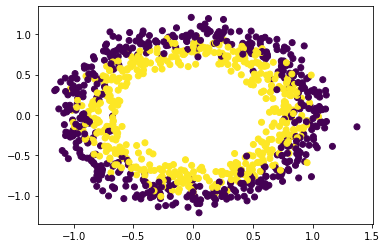

In [149]:
plt.scatter(X[:,0],X[:,1],c=y.T)

In [112]:
#initialize parameters (W,b)
# layer_dims = [n_x,n_h1,n_h2...,n_y] where n_x : input features, n_h : hidden layer size, n_y : o/p size
def initialize_parameters(layer_dims):
    parameters = {}
    for i in range(len(layer_dims)-1):
        parameters['W'+str(i+1)] = np.random.randn(layer_dims[i+1],layer_dims[i])*0.01
        parameters['b'+str(i+1)] = np.zeros((layer_dims[i+1],1))
    return parameters

In [113]:
layer_dims = [2,4,1]
parameters = initialize_parameters(layer_dims)

In [114]:
parameters.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [115]:
#activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

In [116]:
#activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

def relu(z):
    z[z<0]=0
    return z

def relu_derivative(z):
    z[z<0]=0
    z[z>0]=1
    return z

In [117]:
#forward propagation
def forward(X,parameters,layer_dims):
    cache = {}
    cache['A0'] = X.T
    for i in range(len(layer_dims)-1):
        
        cache['Z'+str(i+1)] = np.dot(parameters['W'+str(i+1)],cache['A'+str(i)])+parameters['b'+str(i+1)]
        if i == len(layer_dims)-2:
            cache['A'+str(i+1)] = sigmoid(cache['Z'+str(i+1)])
            #print('Apply sigmoid')
        else:
            cache['A'+str(i+1)] = relu(cache['Z'+str(i+1)])
            #print('Apply relu')
    
    return cache

In [118]:
Z = np.array([[2,3,4],[-1,-1,4],[1,0,-2]])

In [119]:
cache = forward(X,parameters,layer_dims)

In [120]:
#As the sigmoid activation function is used we need to use 
#BCE loss function else the cost function will not be convergent and have multiple
#local minimas
def calc_loss(y_hat,y):
    m = y_hat.shape[1]
    #print(m)
    BCE_loss = -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    return BCE_loss/m

In [121]:
# Equations for this architecture would be 
# dZ = A - Y
# dW = (1/m)*dZ.X.T
#db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
def backprop(cache,y,layer_dims,parameters):
    m = y.shape[1]
    #print(y.shape)
    grads = {}
    for i in reversed(range(len(layer_dims)-1)):
        if i == len(layer_dims) -2:
            grads['dZ'+str(i+1)] = cache['A'+str(i+1)] - y
            
        else:
            
            grads['dZ'+str(i+1)] =(np.dot(parameters['W'+str(i+2)].T,grads['dZ'+str(i+2)])*(relu_derivative(cache['Z'+str(i+1)])))
        grads['dW'+str(i+1)]= (1/m)*np.dot(grads['dZ'+str(i+1)],cache['A'+str(i)].T)
        grads['db'+str(i+1)] = (1/m)*np.sum(grads['dZ'+str(i+1)],axis = 1, keepdims = True)
    return grads  
    

In [122]:
# test forward and backward pass
layer_dims = [2,4,4,4,4,4,4,4,4,4,1]
parameters = initialize_parameters(layer_dims)
cache = forward(X,parameters,layer_dims)
#y = y.reshape(1,len(y))
#grads = backprop(cache,y,layer_dims,parameters)

In [123]:
def update_parameters(parameters,grads,layer_dims,learning_rate=0.5):
    for i in range(len(layer_dims)-1):
        parameters['W'+str(i+1)] -= learning_rate*grads['dW'+str(i+1)]
        parameters['b'+str(i+1)] -= learning_rate*grads['db'+str(i+1)]
    return parameters

In [124]:
def NN_model(X,y,epochs,layer_dims,learning_rate):
    y = y.reshape(1,len(y))
    parameters = initialize_parameters(layer_dims) # genarally we need to pass the layer dims in this
    for i in range(epochs):
        cache = forward(X,parameters,layer_dims)
        loss = calc_loss(cache['A'+str(len(layer_dims)-1)],y)
        if i%50==0:
            print('loss in epoch {} : {}'.format(i,loss))
        grads = backprop(cache,y,layer_dims,parameters)
        parameters = update_parameters(parameters,grads,layer_dims,learning_rate)
    return parameters,grads

In [125]:
def predict(X,parameters):
    cache = forward(X,parameters,layer_dims)
    predicted = cache['A'+str(len(layer_dims)-1)]
    predicted[predicted<0.5] = 0
    predicted[predicted>0.5] = 1
    return predicted

In [165]:
layer_dims = [2,4,5,1]
parameters,grads = NN_model(X,y,1000,layer_dims,learning_rate=0.1) 

loss in epoch 0 : 0.6931472544553422
loss in epoch 50 : 0.693146655162895
loss in epoch 100 : 0.693146607021714
loss in epoch 150 : 0.6931465603417583
loss in epoch 200 : 0.6931465082838005
loss in epoch 250 : 0.6931464508818614
loss in epoch 300 : 0.693146387463798
loss in epoch 350 : 0.6931463187399329
loss in epoch 400 : 0.6931462444456622
loss in epoch 450 : 0.6931461648729533
loss in epoch 500 : 0.6931460792313956
loss in epoch 550 : 0.6931459869427038
loss in epoch 600 : 0.6931458875406705
loss in epoch 650 : 0.693145780063513
loss in epoch 700 : 0.6931456633540627
loss in epoch 750 : 0.6931455364670603
loss in epoch 800 : 0.6931453981024647
loss in epoch 850 : 0.693145246765694
loss in epoch 900 : 0.6931450809962514
loss in epoch 950 : 0.6931448988709684


In [26]:
grads

NameError: name 'grads' is not defined

In [27]:
 predicted = predict(X,parameters)

In [28]:
def accuracy(predicted,y):
    y = y.reshape(1,len(y))
    return (1 - np.sum(abs(y - predicted))/y.shape[1])*100

In [29]:
acc = accuracy(predicted,y)
print('Accuracy of the model is {0:.02f}%'.format(acc))

Accuracy of the model is -100.00%


In [30]:
def plot_decision_boundary(parameters): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = predict(np.c_[xx.ravel(), yy.ravel()],parameters) 
  #  print(Z)
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z) 
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    

In [31]:
plot_decision_boundary(parameters)

ValueError: cannot reshape array of size 360000 into shape (300,300)

# Testing on diabetes dataset

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('diabetes.csv')
X = data.iloc[:,:-1]
X = np.array(X)
y = data.iloc[:,-1]
y = np.array(y)
y[y=='positive']=1.
y[y=='negative']=0.
y = np.array(y,dtype=np.float64)
y = y.reshape(len(y),1)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
layer_dims = [X.shape[1],10,10,y.shape[1]]
parameters,grads = NN_model(X,y,1000,layer_dims,learning_rate=0.001) 